# EE-411 Fundamentals of inference and learning, EPFL 

## Homework 1 solutions

---
---

## <span style="color:green">EX1: First passage time of a 1D Brownian particle</span>

---

### Recall:
The (density of) probability that a particle first reaches a point $x_c$ (at distance $d = |x_c − x_0|$ from the starting point) at time $t$ is given by
$$ p(t|d,D) = \frac{d}{\sqrt{4\pi D t^3}} \exp\left( -\frac{d^2}{4Dt} \right).$$

### <span style="color:green">Question 1</span>: 
#### Write explicitly: 
- ##### the probability $p(\left\{t_i\right\}_{i=1}^n|d,D)$ to observe a set of $n$ independent events at times $\left\{t_i\right\}_{i=1}^n$
- ##### the normalized log-likelihood ${\cal L}(\left\{t_i\right\}_{i=1}^n|d,D) = \frac{\log( p(\left\{t_i\right\}_{i=1}^n|d,D))}{n}$

$p(\left\{t_i\right\}_{i=1}^n|d,D) = \prod_{i=1}^n p(t_i|d,D) = \left(\frac{d}{\sqrt{4\pi D}}\right)^n\prod_{i=1}^n t_i^{-3/2} \exp\left( -\frac{d^2}{4Dt_i} \right)$


${\cal L}(\left\{t_i\right\}_{i=1}^n|d,D) = \log \frac{d}{\sqrt{4\pi D}} +  \frac{1}{n}\sum_{i=1}^n \log \left( t_i^{-3/2} \exp\left( -\frac{d^2}{4Dt_i} \right)\right) = \log \frac{d}{\sqrt{4\pi D}} - \frac{3}{2n}\sum_{i=1}^n \log  t_i - \frac{d^2}{4nD}\sum_{i=1}^n \frac{1}{t_i} $

### <span style="color:green">Question 2</span>: 
- #### Write a program that simulates $n$ such observations sampled from the probability distribution defined above, for fixed $d=2$ and $D$ generic. 
- #### Start with $n=10$ observations and plot the likelihood as a function of $D$. 
- #### Repeat for $n=20,100$, discuss and comment on  what you see.


In [59]:
import numpy as np
np.random.seed(0) 

In [116]:
def loglh(d,D,t):
  n=len(t)
  logl = -n * np.log(D) / 2

  for ti in t: logl -= 3*np.log(ti)/2 + d*d/(4*D*ti)

  return logl/n

Now, for example, we fix $D^*=1$ and plot the loglikelihood

In [117]:
from scipy.stats import levy

n=10
d_true=2
D_true=1

def scale(D,d):
    return d*d/(2*D)

x=levy.rvs(scale=scale(D_true,d_true),size=n)

tab_D=np.linspace(0,5,200)[1:] # we generate a table for D 
logl_D=np.array([loglh(d_true,D,x) for D in tab_D]) # we compute the loglh for each value in the table

Let's define a function to plot at fixed $n$:

In [118]:
import matplotlib.pyplot as plt

def plot_logl(tab_D,logl_D):
    fig, axs = plt.subplots(1,2, figsize=(18,7))
    plt.suptitle(f"n={n}")

    axs[0].set_xlabel('$D$', fontsize=14)
    axs[0].set_ylabel('$L(D)$', fontsize=14)
    axs[0].plot(tab_D,logl_D)
    axs[0].axvline(D_true,color="r",label='$D^*$')
    axs[0].legend(fontsize=14);

    axs[1].set_xlabel('$D$', fontsize=14)
    axs[1].set_ylabel('$e^{(L-L_{\max})}$', fontsize=14)
    axs[1].plot(tab_D,np.exp(logl_D-max(logl_D)))
    axs[1].axvline(D_true,color="r",label='$D^*$')

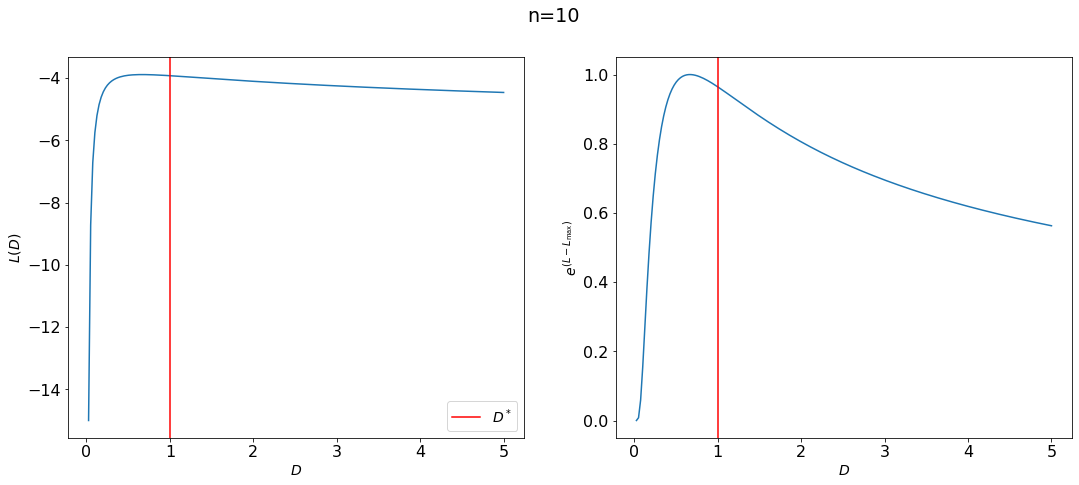

In [119]:
plot_logl(tab_D,logl_D)

Let's see now what happens changing $n$:

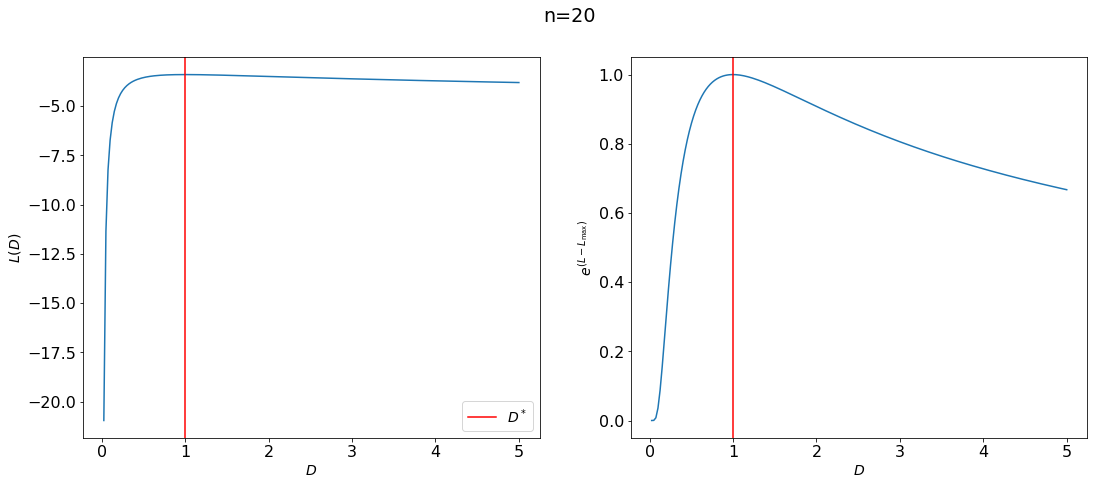

In [120]:
n=20
x=levy.rvs(scale=scale(D_true,d_true),size=n)

tab_D=np.linspace(0,5,200)[1:] # we generate a table for D 
logl_D=np.array([loglh(d_true,D,x) for D in tab_D]) # we compute the loglh for each value in the table
plot_logl(tab_D,logl_D)

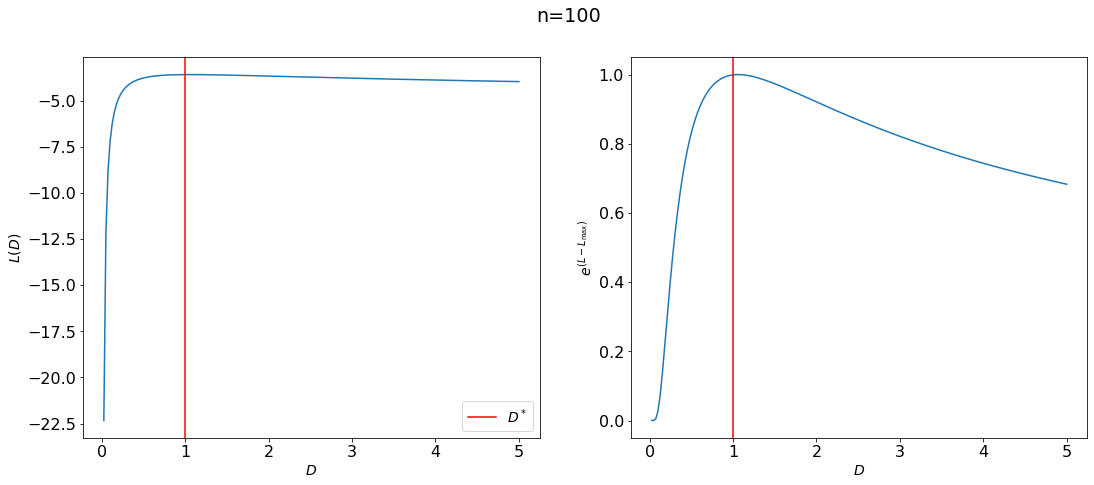

In [121]:
n=100
x=levy.rvs(scale=scale(D_true,d_true),size=n)

tab_D=np.linspace(0,5,200)[1:] # we generate a table for D 
logl_D=np.array([loglh(d_true,D,x) for D in tab_D]) # we compute the loglh for each value in the table
plot_logl(tab_D,logl_D)

The normalized log-likelyhood is getting more and more peaked around true $\lambda$.


### <span style="color:green">Question 3</span>: 
#### We now assume that we are given a set of $n$ observations $\left\{t_i\right\}_{i=1}^n$, without being told the true value $D^*$.  We consider the maximum likelihood estimator
#### $$\hat D_{\rm ML}(\left\{t_i\right\}_{i=1}^n) = \argmax_{D} \left( \log  \left(  p(\left\{x_i\right\}_{i=1}^n|d,D)\right) \right) $$
#### and we shall define the squared error as $\text{SE}=(\hat D_{ML} (\left\{t_i\right\}_{i=1}^n) - D^*)^2$. 
- #### Create some data sets with $n=10,100,1000$ for different values of $D^* \in (0,5]$ and see how the ML estimator performs.


In [131]:
def MSE_n(D_true_tab,func):
    list = []
    for Dt in D_true_tab:
        for _ in range(N_sam):
            D_guess = np.random.uniform(0,5)
            mse=0
            x=levy.rvs(scale=scale(Dt,d_true),size=n)
            optimum = minimize(lambda D:-func(d_true,D,x),D_guess, method='Nelder-Mead')
            mse = mse + (optimum.x - Dt)**2
        list.append(mse/N_sam)
    return list

In [142]:
from scipy.optimize import minimize

n=10
D_true_tab=np.linspace(0.1,5,50)

N_sam = 25 #we average over different samples to get a meaningful estimate
MSE_ML_10 = MSE_n(D_true_tab,loglh)

n=100
MSE_ML_100 = MSE_n(D_true_tab,loglh)

n=1000
MSE_ML_1000 = MSE_n(D_true_tab,loglh)

/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_48259/535729082.py:3: RuntimeWarning: invalid value encountered in log
  logl = -n * np.log(D) / 2
/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_48259/535729082.py:3: RuntimeWarning: divide by zero encountered in log
  logl = -n * np.log(D) / 2
/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_48259/535729082.py:5: RuntimeWarning: divide by zero encountered in true_divide
  for ti in t: logl -= 3*np.log(ti)/2 + d*d/(4*D*ti)
/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_48259/535729082.py:5: RuntimeWarning: invalid value encountered in subtract
  for ti in t: logl -= 3*np.log(ti)/2 + d*d/(4*D*ti)


In [93]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / N

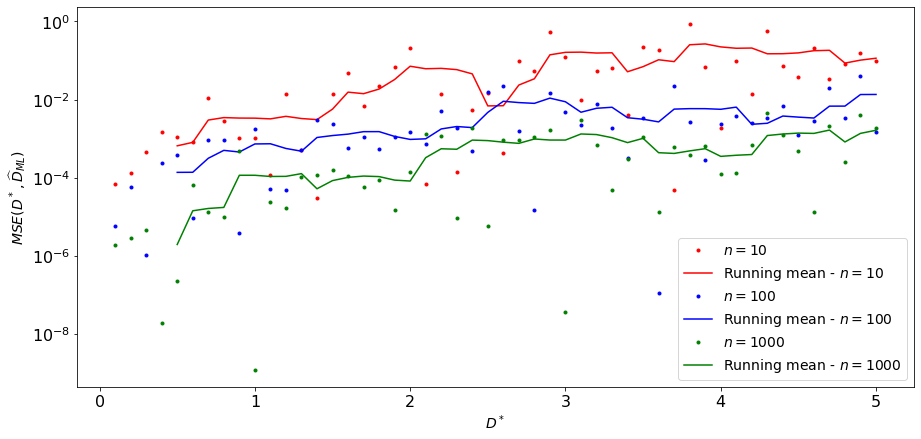

In [129]:
fig, axs = plt.subplots(1,1, figsize=(15,7))

axs.set_xlabel('$D^*$', fontsize=14)
axs.set_ylabel('$MSE(D^*,\widehat{D}_{ML})$', fontsize=14)
axs.plot(D_true_tab,MSE_ML_10, '.' ,label=r"$n=10$", color="red")
axs.plot(D_true_tab[4:],running_mean(MSE_ML_10,5), '-' ,label=r"Running mean - $n=10$", color="red")
axs.plot(D_true_tab,MSE_ML_100, '.', label=r"$n=100$", color="blue")
axs.plot(D_true_tab[4:],running_mean(MSE_ML_100,5), '-' ,label=r"Running mean - $n=100$", color="blue")
axs.plot(D_true_tab,MSE_ML_1000, '.', label=r"$n=1000$", color="green")
axs.plot(D_true_tab[4:],running_mean(MSE_ML_1000,5), '-' ,label=r"Running mean - $n=1000$", color="green")
axs.set_yscale('log')
axs.legend(fontsize=14);

### <span style="color:green">Bonus 1</span>: 
#### Prove that the Fisher in formation $I(D)$ is given by
$$
I_n(D) = n I(D) = n{\mathbb E}_t \left[  \left(\frac{\partial}{\partial D} {\cal L}(t|d,D)) \right)^2 \right] = \frac{n}{2D^2}
$$

We first notice we can write

$$
\frac{\partial \cal L}{\partial D} = \frac{d^2}{4tD^2} - \frac{1}{2D}
$$

such that then

$$
I_n(D) = n{\mathbb E}_t \left[ \frac{d^4}{16D^4}\frac{1}{t^2} - \frac{d^2}{4D^3}\frac{1}{t} + \frac{1}{4D^2}  \right]
$$

The last term, since not depending on t, can be put outside the expectation while the other two lead to integrals which can be solved using the definition of Gamma function. This leads to the following result:

$$
I_n(D) = \frac{3n}{4D^2} - \frac{n}{2D^2} + \frac{n}{4D^2} = \frac{n}{2D^2}
$$

### <span style="color:green">Question 4</span>: 
#### Knowing this, another interesting estimator is given by the maximum as posteriori (MAP) with the Jeffreys prior:
$$
\hat D_{\rm J}(\left\{t_i\right\}_{i=1}^n) = \argmax_{D} \left( \log \left(p\left(\left\{t_i\right\}_{i=1}^n|d,D\right)\sqrt{I(D)}\right) \right)\,.
$$
#### Implement this estimator using scipy and repeat the analysis done in point 3.

Let's analyze the comparison of MSE, Cramers-Rao and MAP estimator with Jeffreys prior at different n.


In [122]:
def JP(d,D,t):
  n=len(t)
  logl = - np.log(2*D*D)/2
  logl = logl - n * np.log(D) /2

  for ti in t: logl -= 3*np.log(ti)/2 + d*d/(4*D*ti)

  return logl/n

In [123]:
n=10
MSE_JP_10 = MSE_n(D_true_tab,JP)

n=100
MSE_JP_100 = MSE_n(D_true_tab,JP)

n=1000
MSE_JP_1000 = MSE_n(D_true_tab,JP)


/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_48259/2644380231.py:4: RuntimeWarning: invalid value encountered in log
  logl = logl - n * np.log(D) /2
/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_48259/2644380231.py:3: RuntimeWarning: divide by zero encountered in log
  logl = - np.log(2*D*D)/2
/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_48259/2644380231.py:4: RuntimeWarning: divide by zero encountered in log
  logl = logl - n * np.log(D) /2
/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_48259/2644380231.py:6: RuntimeWarning: divide by zero encountered in true_divide
  for ti in t: logl -= 3*np.log(ti)/2 + d*d/(4*D*ti)
/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_48259/2644380231.py:6: RuntimeWarning: invalid value encountered in subtract
  for ti in t: logl -= 3*np.log(ti)/2 + d*d/(4*D*ti)


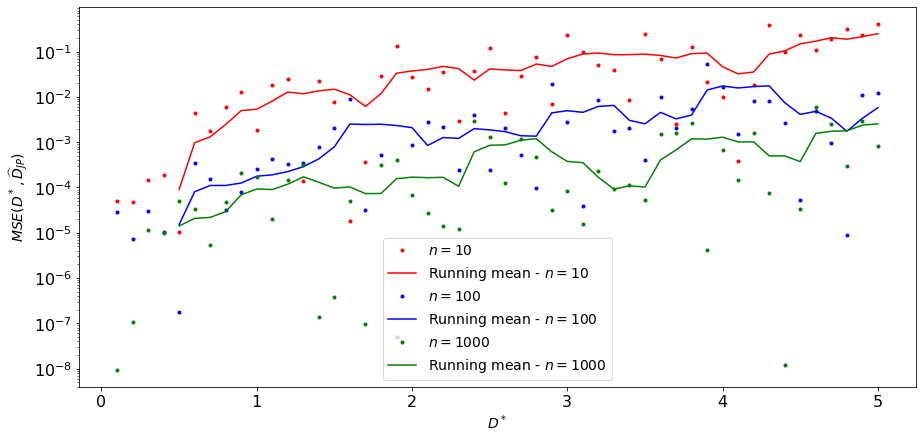

In [130]:
fig, axs = plt.subplots(1,1, figsize=(15,7))

axs.set_xlabel('$D^*$', fontsize=14)
axs.set_ylabel('$MSE(D^*,\widehat{D}_{JP})$', fontsize=14)
axs.plot(D_true_tab,MSE_JP_10, '.' ,label=r"$n=10$", color="red")
axs.plot(D_true_tab[4:],running_mean(MSE_JP_10,5), '-' ,label=r"Running mean - $n=10$", color="red")
axs.plot(D_true_tab,MSE_JP_100, '.', label=r"$n=100$", color="blue")
axs.plot(D_true_tab[4:],running_mean(MSE_JP_100,5), '-' ,label=r"Running mean - $n=100$", color="blue")
axs.plot(D_true_tab,MSE_JP_1000, '.', label=r"$n=1000$", color="green")
axs.plot(D_true_tab[4:],running_mean(MSE_JP_1000,5), '-' ,label=r"Running mean - $n=1000$", color="green")
#axs.set_xscale('log')
axs.set_yscale('log')
axs.legend(fontsize=14);

### <span style="color:green">Question 5 and 6</span>: 
#### - If we average on many realizations (say about a hundred) we can obtain numerically the averaged mean squared error $MSE(D^*,\hat D,n)$ which is thus a function of $n$, $D^*$ and of the estimator $\hat D$. Compute and plot, for $n=10,100,1000$, the curves $MSE(D^*,\hat D_{\rm ML},n)$ and $MSE(D^*,\hat D_{\rm J},n)$ as a function of $D^*$.
#### - How do the MSE curves at various $n$ compare with the Cram\'er-Rao bound for unbiased estimator ${\mathrm  {MSE}}({\hat  {D }})\geq {\frac  {1}{nI(D^*)}}$ (where $I(D)$ is the  Fisher information)? How do the Jeffrey and ML estimator behave? Which one would you choose?

In [160]:
N_rep=1500
def minimizer_D(func,D):
  D_est=np.zeros(N_rep)
  for ir in range(N_rep):
    x=levy.rvs(scale=scale(D,d_true),size=int(N))
    D_est[ir] = minimize(lambda y:-func(d_true,y,x),np.random.uniform(0,30), method='Nelder-Mead').x
  return D_est;

#### $n = 10$

In [195]:
N_est=9
tab_D=np.linspace(0,5,N_est+1)[1:]
N = 10
N_rep = 1500

In [196]:
from numpy import percentile
from numpy.random import choice

def MSE_est(D_est,D):
  N_boot=100
  MSE = (D_est - np.full(N_rep, D))**2 #avoid for loops!
  MSE_mean = MSE.mean()
  MSE_boot = choice(MSE,(N_boot,N_rep))
  MSE_boot_mean = MSE_boot.mean(axis=1)
  CI_min = percentile(MSE_boot_mean, [2.5,97.5])[0]
  CI_max = percentile(MSE_boot_mean, [2.5,97.5])[1]

  return MSE_mean, CI_min, CI_max

In [197]:
D_ML= np.array([ minimizer_D(loglh,D) for D in tab_D])
D_J= np.array([ minimizer_D(JP,D) for D in tab_D])

/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_48259/535729082.py:3: RuntimeWarning: invalid value encountered in log
  logl = -n * np.log(D) / 2
/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_48259/535729082.py:3: RuntimeWarning: divide by zero encountered in log
  logl = -n * np.log(D) / 2
/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_48259/535729082.py:5: RuntimeWarning: divide by zero encountered in true_divide
  for ti in t: logl -= 3*np.log(ti)/2 + d*d/(4*D*ti)
/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_48259/535729082.py:5: RuntimeWarning: invalid value encountered in subtract
  for ti in t: logl -= 3*np.log(ti)/2 + d*d/(4*D*ti)
/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_48259/2644380231.py:4: RuntimeWarning: invalid value encountered in log
  logl = logl - n * np.log(D) /2
/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_48259/2644380231.py:4: RuntimeWarning: divide by zero encountered in log
  logl 

In [198]:
MSE_ML_10 = np.zeros(N_est)
CI_min_ML_10 = np.zeros(N_est)
CI_max_ML_10 = np.zeros(N_est)
MSE_J_10 = np.zeros(N_est)
CI_min_J_10 = np.zeros(N_est)
CI_max_J_10 = np.zeros(N_est)

for j,D in enumerate(tab_D):
  MSE, CI_min, CI_max = MSE_est(D_ML[j], D)
  MSE_ML_10[j] = MSE
  CI_min_ML_10[j] = CI_min
  CI_max_ML_10[j] = CI_max
  MSE, CI_min, CI_max = MSE_est(D_J[j], D)
  MSE_J_10[j] = MSE
  CI_min_J_10[j] = CI_min
  CI_max_J_10[j] = CI_max

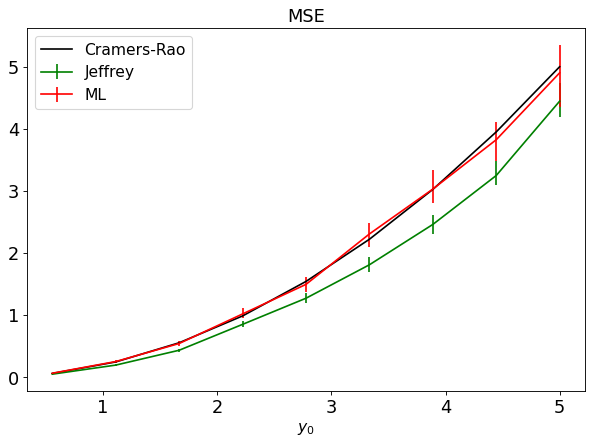

In [165]:
fig = plt.figure(figsize=(9, 6), dpi=80)

plt.title('MSE', fontsize=16)
plt.xlabel('$y_0$', fontsize=14)
plt.errorbar(tab_D,MSE_J_10,yerr=[MSE_J_10-CI_min_J_10, CI_max_J_10-MSE_J_10],marker="",color='g', label='Jeffrey')
plt.errorbar(tab_D,MSE_ML_10,yerr=[MSE_ML_10-CI_min_ML_10, CI_max_ML_10-MSE_ML_10],marker="",color='r', label='ML')
plt.plot(tab_D, 2*tab_D*tab_D/N, label='Cramers-Rao', color="k")
plt.legend(fontsize=14)

#### $n = 100$

In [166]:
N_est=9
tab_D=np.linspace(0,5,N_est+1)[1:]
N = 100
N_rep = 250

In [167]:
D_ML= np.array([ minimizer_D(loglh,D) for D in tab_D])
D_J= np.array([ minimizer_D(JP,D) for D in tab_D])

/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_48259/535729082.py:3: RuntimeWarning: invalid value encountered in log
  logl = -n * np.log(D) / 2
/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_48259/535729082.py:3: RuntimeWarning: divide by zero encountered in log
  logl = -n * np.log(D) / 2
/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_48259/535729082.py:5: RuntimeWarning: divide by zero encountered in true_divide
  for ti in t: logl -= 3*np.log(ti)/2 + d*d/(4*D*ti)
/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_48259/535729082.py:5: RuntimeWarning: invalid value encountered in subtract
  for ti in t: logl -= 3*np.log(ti)/2 + d*d/(4*D*ti)
/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_48259/2644380231.py:4: RuntimeWarning: invalid value encountered in log
  logl = logl - n * np.log(D) /2
/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_48259/2644380231.py:4: RuntimeWarning: divide by zero encountered in log
  logl 

In [168]:
from numpy import percentile
from numpy.random import choice

def MSE_est(D_est,D):
  N_boot=100
  MSE = (D_est - np.full(N_rep, D))**2 #avoid for loops!
  MSE_mean = MSE.mean()
  MSE_boot = choice(MSE,(N_boot,N_rep))
  MSE_boot_mean = MSE_boot.mean(axis=1)
  CI_min = percentile(MSE_boot_mean, [2.5,97.5])[0]
  CI_max = percentile(MSE_boot_mean, [2.5,97.5])[1]

  return MSE_mean, CI_min, CI_max

In [169]:
MSE_ML_100 = np.zeros(N_est)
CI_min_ML_100 = np.zeros(N_est)
CI_max_ML_100 = np.zeros(N_est)
MSE_J_100 = np.zeros(N_est)
CI_min_J_100 = np.zeros(N_est)
CI_max_J_100 = np.zeros(N_est)

for j,D in enumerate(tab_D):
  MSE, CI_min, CI_max = MSE_est(D_ML[j], D)
  MSE_ML_100[j] = MSE
  CI_min_ML_100[j] = CI_min
  CI_max_ML_100[j] = CI_max
  MSE, CI_min, CI_max = MSE_est(D_J[j], D)
  MSE_J_100[j] = MSE
  CI_min_J_100[j] = CI_min
  CI_max_J_100[j] = CI_max

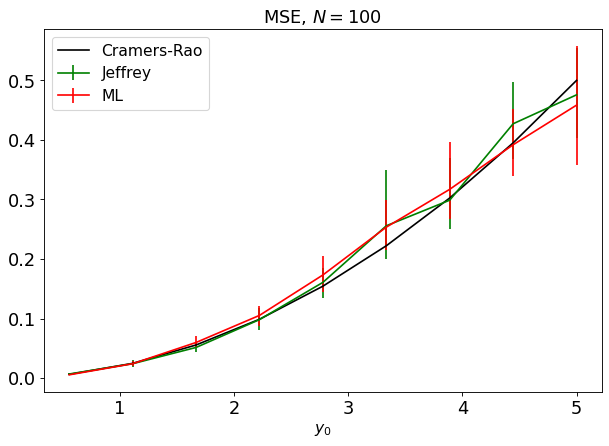

In [170]:
fig = plt.figure(figsize=(9, 6), dpi=80)

plt.title(r'MSE, $N=100$', fontsize=16)
plt.xlabel('$y_0$', fontsize=14)
plt.errorbar(tab_D,MSE_J_100,yerr=[MSE_J_100-CI_min_J_100, CI_max_J_100-MSE_J_100],marker="",color='g', label='Jeffrey')
plt.errorbar(tab_D,MSE_ML_100,yerr=[MSE_ML_100-CI_min_ML_100, CI_max_ML_100-MSE_ML_100],marker="",color='r', label='ML')
plt.plot(tab_D, 2*tab_D*tab_D/N, label='Cramers-Rao', color="k")
plt.legend(fontsize=14)

#### $n = 1000$

In [171]:
N_est=9
tab_D=np.linspace(0,5,N_est+1)[1:]
N = 1000
N_rep = 50

In [172]:
D_ML= np.array([ minimizer_D(loglh,D) for D in tab_D])
D_J= np.array([ minimizer_D(JP,D) for D in tab_D])

/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_48259/535729082.py:3: RuntimeWarning: invalid value encountered in log
  logl = -n * np.log(D) / 2
/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_48259/535729082.py:3: RuntimeWarning: divide by zero encountered in log
  logl = -n * np.log(D) / 2
/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_48259/535729082.py:5: RuntimeWarning: divide by zero encountered in true_divide
  for ti in t: logl -= 3*np.log(ti)/2 + d*d/(4*D*ti)
/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_48259/535729082.py:5: RuntimeWarning: invalid value encountered in subtract
  for ti in t: logl -= 3*np.log(ti)/2 + d*d/(4*D*ti)
/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_48259/2644380231.py:4: RuntimeWarning: invalid value encountered in log
  logl = logl - n * np.log(D) /2
/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_48259/2644380231.py:4: RuntimeWarning: divide by zero encountered in log
  logl 

In [173]:
from numpy import percentile
from numpy.random import choice

def MSE_est(D_est,D):
  N_boot=100
  MSE = (D_est - np.full(N_rep, D))**2 #avoid for loops!
  MSE_mean = MSE.mean()
  MSE_boot = choice(MSE,(N_boot,N_rep))
  MSE_boot_mean = MSE_boot.mean(axis=1)
  CI_min = percentile(MSE_boot_mean, [2.5,97.5])[0]
  CI_max = percentile(MSE_boot_mean, [2.5,97.5])[1]

  return MSE_mean, CI_min, CI_max

In [174]:
MSE_ML_1000 = np.zeros(N_est)
CI_min_ML_1000 = np.zeros(N_est)
CI_max_ML_1000 = np.zeros(N_est)
MSE_J_1000 = np.zeros(N_est)
CI_min_J_1000 = np.zeros(N_est)
CI_max_J_1000 = np.zeros(N_est)

for j,D in enumerate(tab_D):
  MSE, CI_min, CI_max = MSE_est(D_ML[j], D)
  MSE_ML_1000[j] = MSE
  CI_min_ML_1000[j] = CI_min
  CI_max_ML_1000[j] = CI_max
  MSE, CI_min, CI_max = MSE_est(D_J[j], D)
  MSE_J_1000[j] = MSE
  CI_min_J_1000[j] = CI_min
  CI_max_J_1000[j] = CI_max

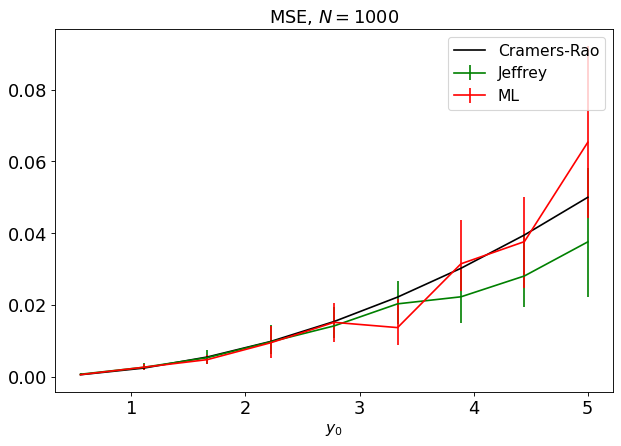

In [175]:
fig = plt.figure(figsize=(9, 6), dpi=80)

plt.title(r'MSE, $N=1000$', fontsize=16)
plt.xlabel('$y_0$', fontsize=14)
plt.errorbar(tab_D,MSE_J_1000,yerr=[MSE_J_1000-CI_min_J_1000, CI_max_J_1000-MSE_J_1000],marker="",color='g', label='Jeffrey')
plt.errorbar(tab_D,MSE_ML_1000,yerr=[MSE_ML_1000-CI_min_ML_1000, CI_max_ML_1000-MSE_ML_1000],marker="",color='r', label='ML')
plt.plot(tab_D, 2*tab_D*tab_D/N, label='Cramers-Rao', color="k")
plt.legend(fontsize=14)

### <span style="color:green">Bonus 2</span>: 
#### Look at the median of the Levy distribution on Wikipedia. Can you design an estimator for $D$ from it? Repeat the analysis at point 3  and at points 5 and 6 for this third estimator and compare its performances to the other two.

In [179]:
from scipy.special import erfc

def median_est_D(D):
  D_est=np.zeros(N_rep)
  for ir in range(N_rep):
    x=levy.rvs(scale=scale(D,d_true),size=int(N))
    med_est = np.median(x)
    scale_est = 2*med_est*(erfc(0.5))**(2)
    D_est[ir] = d_true*d_true/(2*scale_est)
  return D_est;

#### $n = 10$

In [180]:
N_est=9
tab_D=np.linspace(0,5,N_est+1)[1:]
N = 10
N_rep = 1500

In [181]:
D_MED= np.array([ median_est_D(D) for D in tab_D])

In [182]:
MSE_MED_10 = np.zeros(N_est)
CI_min_MED_10 = np.zeros(N_est)
CI_max_MED_10 = np.zeros(N_est)

for j,D in enumerate(tab_D):
  MSE, CI_min, CI_max = MSE_est(D_MED[j], D)
  MSE_MED_10[j] = MSE
  CI_min_MED_10[j] = CI_min
  CI_max_MED_10[j] = CI_max

#### $n = 100$

In [186]:
N_est=9
tab_D=np.linspace(0,5,N_est+1)[1:]
N = 100
N_rep = 1500

In [187]:
D_MED= np.array([ median_est_D(D) for D in tab_D])

In [188]:
MSE_MED_100 = np.zeros(N_est)
CI_min_MED_100 = np.zeros(N_est)
CI_max_MED_100 = np.zeros(N_est)

for j,D in enumerate(tab_D):
  MSE, CI_min, CI_max = MSE_est(D_MED[j], D)
  MSE_MED_100[j] = MSE
  CI_min_MED_100[j] = CI_min
  CI_max_MED_100[j] = CI_max

#### $n = 1000$

In [189]:
N_est=9
tab_D=np.linspace(0,5,N_est+1)[1:]
N = 1000
N_rep = 1500

In [190]:
D_MED= np.array([ median_est_D(D) for D in tab_D])

In [191]:
MSE_MED_1000 = np.zeros(N_est)
CI_min_MED_1000 = np.zeros(N_est)
CI_max_MED_1000 = np.zeros(N_est)

for j,D in enumerate(tab_D):
  MSE, CI_min, CI_max = MSE_est(D_MED[j], D)
  MSE_MED_1000[j] = MSE
  CI_min_MED_1000[j] = CI_min
  CI_max_MED_1000[j] = CI_max

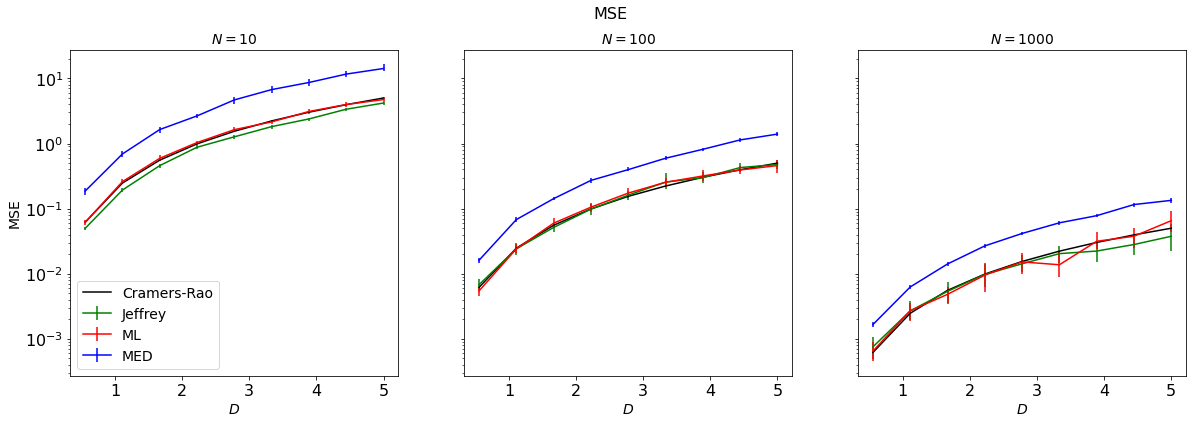

In [202]:
fig, axs = plt.subplots(1,3,figsize=(20, 6), sharey=True)

plt.suptitle(r'MSE', fontsize=16)
axs[0].set_xlabel('$D$', fontsize=14)
axs[0].set_ylabel('MSE', fontsize=14)
axs[0].set_title('$N=10$', fontsize=14)
axs[0].errorbar(tab_D,MSE_J_10,yerr=[MSE_J_10-CI_min_J_10, CI_max_J_10-MSE_J_10],marker="",color='g', label='Jeffrey')
axs[0].errorbar(tab_D,MSE_ML_10,yerr=[MSE_ML_10-CI_min_ML_10, CI_max_ML_10-MSE_ML_10],marker="",color='r', label='ML')
axs[0].errorbar(tab_D,MSE_MED_10,yerr=[MSE_MED_10-CI_min_MED_10, CI_max_MED_10-MSE_MED_10],marker="",color='b', label='MED')
axs[0].set_yscale('log')
axs[0].plot(tab_D, 2*tab_D*tab_D/10, label='Cramers-Rao', color="k")
axs[0].legend(fontsize=14)
axs[1].set_xlabel('$D$', fontsize=14)
axs[1].set_title('$N=100$', fontsize=14)
axs[1].errorbar(tab_D,MSE_J_100,yerr=[MSE_J_100-CI_min_J_100, CI_max_J_100-MSE_J_100],marker="",color='g', label='Jeffrey')
axs[1].errorbar(tab_D,MSE_ML_100,yerr=[MSE_ML_100-CI_min_ML_100, CI_max_ML_100-MSE_ML_100],marker="",color='r', label='ML')
axs[1].errorbar(tab_D,MSE_MED_100,yerr=[MSE_MED_100-CI_min_MED_100, CI_max_MED_100-MSE_MED_100],marker="",color='b', label='MED')
axs[1].set_yscale('log')
axs[1].plot(tab_D, 2*tab_D*tab_D/100, label='Cramers-Rao', color="k")
axs[2].set_xlabel('$D$', fontsize=14)
axs[2].set_title('$N=1000$', fontsize=14)
axs[2].errorbar(tab_D,MSE_J_1000,yerr=[MSE_J_1000-CI_min_J_1000, CI_max_J_1000-MSE_J_1000],marker="",color='g', label='Jeffrey')
axs[2].errorbar(tab_D,MSE_ML_1000,yerr=[MSE_ML_1000-CI_min_ML_1000, CI_max_ML_1000-MSE_ML_1000],marker="",color='r', label='ML')
axs[2].errorbar(tab_D,MSE_MED_1000,yerr=[MSE_MED_1000-CI_min_MED_1000, CI_max_MED_1000-MSE_MED_1000],marker="",color='b', label='MED')
axs[2].set_yscale('log')
axs[2].plot(tab_D, 2*tab_D*tab_D/1000, label='Cramers-Rao', color="k")

## <span style="color:green">EX2: Probability bounds and a pooling problem

---

We are going to follow the steps we took in lecture $1$ and prove an interesting inequality:  Let $Z_1,\ldots,Z_m$ be independent random variables such that $Z_i =1$ with probability $p$, and $0$ with probability $1-p$. Then, for any $\epsilon \ge 0$ we have
$$
\mathbb{P}\left(\frac 1m \sum_i Z_i  \ge p + \epsilon \right) \le e^{-2m\epsilon^2}
$$

### <span style="color:green">Question 1</span>: 
#### Using Markov inequality and the proof strategy discussed in lecture 1, show that:
$$
\mathcal{P} \equiv \mathbb{P}\left(\frac 1m \sum_i Z_i  \ge p + \epsilon \right) \le \left(\frac{p e^{\lambda} + (1-p)}{e^{\lambda(p+\epsilon)}}\right)^m
$$

We can rewrite

$$
\mathcal{P} = \mathbb{P}\bigg( e^{\lambda \sum_i^mz_i} \geq e^{\lambda m (p+\epsilon)} \bigg)
$$

And using Markov

$$
\mathcal{P} \leq \frac{\mathbb{E}_{z_i}\big[e^{\lambda\sum_i^m z_i}\big]}{e^{\lambda(p+\epsilon)m}} = \frac{\prod_i^m \big[ pe^{\lambda} + (1-p) \big]}{e^{\lambda(p+\epsilon)m}} = \Bigg[ \frac{ pe^{\lambda} + (1-p)}{e^{\lambda(p+\epsilon)}} \Bigg]^m
$$

### <span style="color:green">Question 2</span>: 
#### Using the value of $\lambda$ that minimizes the right-hand side of the former equation, show that
$$
\mathbb{P}\left(\frac 1m \sum_i Z_i  \ge p + \epsilon \right) \le e^{-m f(p,\epsilon)}
$$
### with 
$$
f(p,\epsilon) = -\log \left(\left({\frac {p}{p+\epsilon }}\right)^{p+\epsilon }{\left({\frac {1-p}{1-p-\epsilon }}\right)}^{1-p-\epsilon }\right)
$$

We derive the expression inside the parentheses found in question 1 to find the extrema $\overline{\lambda}$:

$$
\frac{\partial }{\partial \lambda} \log \left(\frac{p e^{\lambda} + (1-p)}{e^{\lambda(p+\epsilon)}}\right) = \frac{\partial }{\partial \lambda} \left( \log \left(pe^{\lambda} + (1-p)\right) \right) - (p+\epsilon) =  \frac{pe^{\lambda}}{pe^{\lambda} + (1-p)} - p - \epsilon = 0
$$

Inverting the expression

$$
e^{\overline{\lambda}} = \frac{(1-p)(p+\epsilon)}{p(1-p-\epsilon)} \quad \Longrightarrow \quad \overline{\lambda} = \log\bigg( \frac{(1-p)(p+\epsilon)}{p(1-p-\epsilon)}\bigg)
$$

Computing the second derivative and evaluating it at $\overline{\lambda}$ one can check (*see cell below*) that it is indeed a mimimum for every $\epsilon>0$ and every $p \in[0,1-\epsilon]$. Therefore we can write

$$
\mathcal{P} \leq \Bigg[ \frac{ \frac{(1-p)(p+\epsilon)}{1-p-\epsilon} +1 - p}{\Big( \frac{(1-p)(p+\epsilon))}{p(1-p-\epsilon)} \Big)^{p+\epsilon}}\Bigg]^m = \exp\bigg\{-m \log \Bigg[ \frac{\Big( \frac{(1-p)(p+\epsilon))}{p(1-p-\epsilon)} \Big)^{p+\epsilon}}{ \frac{1-p}{1-p-\epsilon}}\Bigg] \bigg\}
$$

Using the properties of the logarithm one can rewrite this expression as 

$$
\mathcal{P} \le e^{-m f(p,\epsilon)}
$$

where

$$
f(p,\epsilon) = (p+\epsilon)\log\bigg( \frac{p+\epsilon}{p} \bigg) + (1-p-\epsilon)\log\bigg( \frac{1-p-\epsilon}{1-p} \bigg)
$$

Which is equivalent to the expression we wanted to prove.

/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_48259/2790018910.py:11: RuntimeWarning: invalid value encountered in double_scalars
  Z = np.array([ np.array([ (((1 - p)*(p + eps))/(p*(-p - eps + 1)))**(-p - eps) *(((1 - p)*(p + eps - 1)**2 *(p + eps))/(-p - eps + 1) - (p - 1)*(-p - eps)**2) for eps in table_eps ]) for p in table_p ])
/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_48259/2790018910.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  Z = np.array([ np.array([ (((1 - p)*(p + eps))/(p*(-p - eps + 1)))**(-p - eps) *(((1 - p)*(p + eps - 1)**2 *(p + eps))/(-p - eps + 1) - (p - 1)*(-p - eps)**2) for eps in table_eps ]) for p in table_p ])


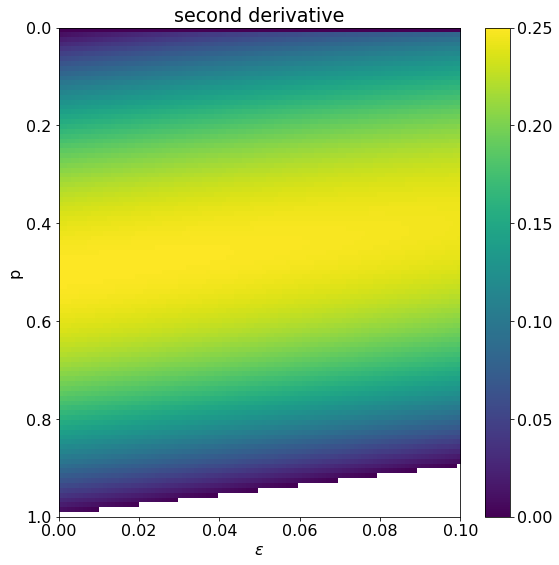

In [3]:
#Plot to see that the sign of the second derivative is always positive

plt.rcParams["figure.figsize"] = (9, 9)
plt.rcParams["font.size"] = 16

table_p=np.linspace(0,1.,101,endpoint=True)
table_eps=np.linspace(0,0.1,101,endpoint=True)

x, y = np.meshgrid(table_eps, table_p)

Z = np.array([ np.array([ (((1 - p)*(p + eps))/(p*(-p - eps + 1)))**(-p - eps) *(((1 - p)*(p + eps - 1)**2 *(p + eps))/(-p - eps + 1) - (p - 1)*(-p - eps)**2) for eps in table_eps ]) for p in table_p ])

im = plt.imshow(Z , extent=[0,0.1,1,0], aspect='auto')  
#cset = plt.contourf(x,y,Z, linewidths=2, cmap=plt.cm.Set2)
#plt.clabel(cset, inline=True, fmt='%1.3f', fontsize=10)
plt.colorbar(im)  
plt.xlabel(r'$\epsilon$')
plt.ylabel('p')
#plt.xlim(0,0.1)
plt.title('second derivative')
#plt.ylim(0,1)

plt.show()

### <span style="color:green">Question 3</span>: 
#### Show that 
$$
f(p,\epsilon=0)=0,\, \frac {\partial f(p,\epsilon)}{\partial \epsilon} \bigg|_{\epsilon=0} = 0,\text{ and that } \frac {\partial^2 f(p,\epsilon)}{\partial \epsilon^2}  \ge 4~\text{ for any }\epsilon.
$$

The first one is trivial, we have simply $f(p,0) = -\log{1} = 0\,.$

For the second one we can write 
$$
\frac{\partial f(p,\epsilon)}{\partial \epsilon} = \log\Big(\frac{p+\epsilon}{p}\Big) + \frac{p}{p} - \log\bigg( \frac{1-p-\epsilon}{1-p} \bigg) - \frac{1-p}{1-p}
$$
And therefore

$$
\frac{\partial f(p,\epsilon)}{\partial \epsilon}\bigg|_{\epsilon=0} = 0+1-0-1 = 0
$$

For the third one we can comopute the second derivative:

$$
\frac{\partial^2 f(p,\epsilon)}{\partial \epsilon^2} = \frac{1}{p+\epsilon} + \frac{1}{1-p-\epsilon} = \frac{1}{(p+\epsilon)(1-(p+\epsilon))}
$$

Calling $x = p + \epsilon$, we see that the second derivative has a minimum at $x= 1/2$, where we have

$$
\frac{\partial^2 f(p,\epsilon)}{\partial \epsilon^2}\Bigg|_{p+\epsilon=1/2} = 4
$$

And from this result the answer to the question follows in a straightforward way.

### <span style="color:green">Question 4</span>: 
#### Use Taylor's theorem (that states that $f(p,\epsilon)=f(p,0)+\epsilon f'(p,0) + \epsilon^2 f''(p,\tilde \epsilon)/2$ for some unknown $\tilde \epsilon$, and where the prime stands for derivative with respect to $\epsilon$) to show that $f(p,\epsilon)\ge2\epsilon^2$, and prove the inequality

Using what we just found, we can simply write

$$
f(p,\epsilon) \geq f(p,0)+\epsilon f'(p,0) + \epsilon^2 \frac{4}{2} = 0 + 0 + 2\epsilon^2
$$

Then, using the result of Question 2 and the fact that the exponential is a monothonic function, this inequality brings us directly to the final result.

### <span style="color:green">Bonus 3</span>: 

We can rewrite

$$
\mathcal{P_2} = \mathbb{P}\bigg( - \sum_i^mz_i \geq m (\epsilon-p) \bigg) =\mathbb{P}\bigg( e^{-\lambda \sum_i^mz_i} \geq e^{\lambda m (\epsilon-p)} \bigg)
$$

And using Markov

$$
\mathcal{P_2} \leq \frac{\mathbb{E}_{z_i}\big[e^{-\lambda\sum_i^m z_i}\big]}{e^{\lambda(-p+\epsilon)m}} = \frac{\prod_i^m \big[ pe^{-\lambda} + (1-p) \big]}{e^{\lambda(-p+\epsilon)m}} = \Bigg[ \frac{ pe^{-\lambda} + (1-p)}{e^{\lambda(-p+\epsilon)}} \Bigg]^m
$$

We derive the expression inside the parentheses to find the extrema:

$$
\frac{\partial }{\partial \lambda} \left(\frac{p e^{-\lambda} + (1-p)}{e^{\lambda(-p+\epsilon)}}\right)\bigg|_{\overline{\lambda}} = p(-1+p-\epsilon)e^{\lambda(-2+p-\epsilon)}-(1-p)(-p+\epsilon)e^{-\lambda(1-p+\epsilon)}\big|_{\overline{\lambda}} = 0
$$

Inverting the expression

$$
e^{-\overline{\lambda}} = \frac{(1-p)(p-\epsilon)}{p(1-p+\epsilon)} \quad \Longrightarrow \quad \overline{\lambda} = -\log\bigg( \frac{(1-p)(p-\epsilon)}{p(1-p+\epsilon)}\bigg)
$$

Computing the second derivative and evaluating it at $\overline{\lambda}$ one can check that it is indeed a mimimum for every $\epsilon>0$ and every $p \in[0,1-\epsilon]$. Therefore we can write

$$
\mathcal{P_2} \leq \Bigg[ \frac{ \frac{(1-p)(p-\epsilon)}{1-p+\epsilon} +1 - p}{\Big( \frac{(1-p)(p-\epsilon))}{p(1-p+\epsilon)} \Big)^{p-\epsilon}}\Bigg]^m = \exp\bigg\{-m \log \Bigg[ \frac{\Big( \frac{(1-p)(p-\epsilon))}{p(1-p+\epsilon)} \Big)^{p-\epsilon}}{ \frac{1-p}{1-p+\epsilon}}\Bigg] \bigg\}
$$

Using the properties of the logarithm one can rewrite this expression as 

$$
\mathcal{P_2} \le e^{-m f(p,\epsilon)}
$$

where

$$
f(p,\epsilon) = (p-\epsilon)\log\bigg( \frac{p-\epsilon}{p} \bigg) + (1-p+\epsilon)\log\bigg( \frac{1-p+\epsilon}{1-p} \bigg)
$$

- $f(p,0) = \log{1} = 0\,.$

 - For the first derivative we can write 
$$
\frac{\partial f(p,\epsilon)}{\partial \epsilon} = -\log\Big(\frac{p-\epsilon}{p}\Big) - \frac{p}{p} + \log\bigg( \frac{1-p+\epsilon}{1-p} \bigg) + \frac{1-p}{1-p}
$$
And therefore

$$
\frac{\partial f(p,\epsilon)}{\partial \epsilon}\bigg|_{\epsilon=0} = 0-1-0+1 = 0
$$

- The second derivative:

$$
\frac{\partial^2 f(p,\epsilon)}{\partial \epsilon^2} = \frac{1}{p-\epsilon} + \frac{1}{1-p+\epsilon} = \frac{1}{(p-\epsilon)(1-(p-\epsilon))}
$$

Calling $x = p - \epsilon$, we see again that the second derivative has a minimum at $x= 1/2$, where we have

$$
\frac{\partial^2 f(p,\epsilon)}{\partial \epsilon^2}\Bigg|_{p+\epsilon=1/2} = 4
$$

And from this point forward the derivation is exactly the same as before.

### <span style="color:green">Question 5</span>: 
####  The number one use of such a bound is in terms of pooling problems. Suppose you want to know what fraction of the population in a country approves its current president: how many people should you ask to be confident, with probability at least $95$ percent, that the error in estimating the fraction of people who approves the  president is correct within one percent (so that $\hat p$ is in $[p - 0.01, p + 0.01]$ with $95\%$ probability)?

In practice, the question is fixing the following parameters:

* $\mathcal{P}=1 - 0.95 = 0.05$
* $\epsilon=0.01$

Therefore we can answer the question just by plugging them in the formula just found:

$0.05 = 2 e ^{-2m^* 0.01^2} \Longrightarrow -2\cdot 10^{-4} m^* = \ln{\frac{1}{40}}  \Longrightarrow m^* = \frac{\ln{40}}{2}\cdot 10^4 \approx 18400$

### <span style="color:green">Question 6</span>: 
#### Compare the number $m^*$ you find this way with what you observe when performing numerical experiments in python: 
* Define a function that takes $m$ and the true $p$ as arguments and returns a random array of $m$ votes (it has to work with generic $m$ and $p$).
* Starting with fixed values of $m=m^*$ and $p \in \{0.2,0.5,0.8\}$
  *   Use this function evaluated in $m^*$ and $p$ to simulate polls. 
  * Just by using the generated votes, estimate $p$.
  * Quantify the probability that $\hat{p}$ is correct within one percent. 
* Which values of $p$ seem to be harder to estimate? Do you find that the bound is accurate, or does it grossly overestimate the needed number?
* For each $p$, repeat for different values of $m$ to find the value that (more or less) gives an estimate which is correct within one percent with $95\%$ probability.


There is actually a function that does all the generation for us in `scipy.stats`

In [4]:
from scipy.stats import bernoulli

m_star = int(0.5 * np.log(40) * 10**4)

def votes_gen(m,p):
  return  bernoulli.rvs(p, size=m)

In [5]:
tab_p = [0.2,0.5,0.8]

def prob_corr(m, p, err=0.01, N_rep = 2000):
  return np.sum(abs(np.array([ np.mean(votes_gen(m,p)) for i in range(N_rep) ]) - p ) < err)/N_rep

In [6]:
p_star = np.array([ prob_corr(m_star, p) for p in tab_p])
p_star

array([0.9995, 0.991 , 0.9995])

Just from these three values of $p$ we see two important things:

* Intermediate values of $p$ are harder to estimate compared to values near the border of the interval $[0,1]$.
* For all the three values the bound grossly over-estimates the number of people we need for the poll (we find a probability larger than $99.5\%$ in all the three cases, while the bound requested to be correct just the $95\%$ of the times).

In [7]:
tab_m = np.linspace(50,12000,30,dtype=int)
p_corr = np.array([ np.array([ prob_corr(m, p) for m in tab_m ]) for p in tab_p])

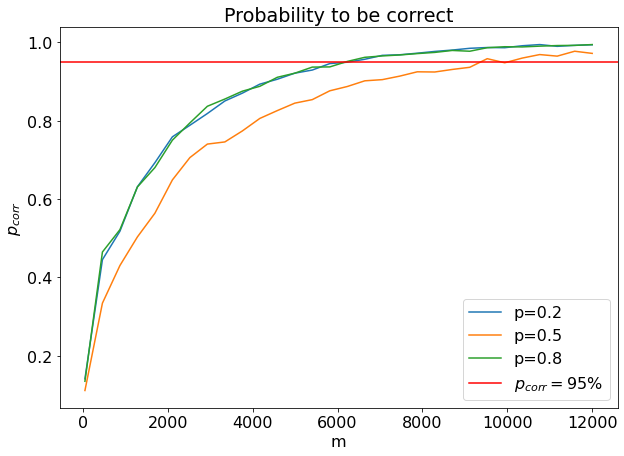

In [8]:
fig = plt.figure(figsize=(10,7))
plt.title('Probability to be correct')
plt.xlabel('m')
plt.ylabel(r'$p_{corr}$')
for i,p in enumerate(tab_p):
  plt.plot(tab_m,p_corr[i], label=r'p={}'.format(p))
plt.axhline(y=0.95, color='r', linestyle='-', label=r'$p_{corr} = 95\%$')
plt.legend()
plt.show()

As we expected, the curves intercept the horizontal line at values of $m$ which are much smaller that the theoretical $m^*$.

### <span style="color:green">Bonus 4</span>: 
####  Plot the behaviour of the probability of error $\mathbb{P}\big(\hat p \notin [p - 0.01, p + 0.01]\big)$ as a function of $p$ for values of $m\in[10,10^4]$, and compare it with the theoretical $m^*$.

In [9]:
tab_m = [100,400,1600,6400]
tab_p = np.linspace(0,1,25)

In [10]:
p_err = 1 - np.array([ np.array([ prob_corr(m, p) for p in tab_p ]) for m in tab_m])

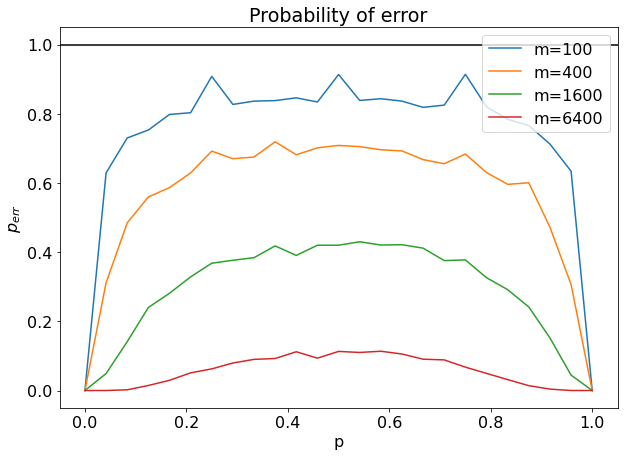

In [11]:
fig = plt.figure(figsize=(10,7))
plt.title('Probability of error')
plt.xlabel('p')
plt.ylabel(r'$p_{err}$')
for i,m in enumerate(tab_m):
  plt.plot(tab_p,p_err[i], label=r'm={}'.format(m))
plt.axhline(y=1, color='k', linestyle='-')
plt.legend()
plt.show()